<a href="https://colab.research.google.com/github/Shresth-Mehta/Neural_Networks_API/blob/master/Density_Based_Clustering_of_applications_with_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [0]:
class Dbscan:
  def __init__(self,ep,minPts,p):
    self.ep=ep
    self.minPts=minPts
    self.p=p
    self.labels=[]
    self.data_points=[]
  
  def fit(self,X):
    n_clusters=-1
    self.data_points=[]
    for x in X:
      self.data_points.append(Point(x))
    for point in self.data_points:
      if(point.cluster==-2):
        N=self.get_neighbors(point)
        #print(len(N),n_clusters+1)
        if(len(N)+1<self.minPts):
          point.cluster=-1
        else:
          n_clusters+=1
          point.cluster=n_clusters
          stack=[]
          for n_point in N:
            stack.append(n_point)
          while(len(stack)!=0):
            temp=stack.pop()
            if(temp.cluster<0):
              temp.cluster=n_clusters
              N_2=self.get_neighbors(temp)
              if(len(N_2)+1>=self.minPts):
                for n_temp in N_2:
                  stack.append(n_temp)
    self.labels=[]
    for point in self.data_points:
      self.labels.append(point.cluster)

  def __get_distance(self,dp1,dp2):
    return (np.sum(np.abs(dp1-dp2)**self.p))**(1/self.p)
  def get_neighbors(self,current):
    ans=[]
    for point in self.data_points:
      d=self.__get_distance(current.value,point.value)
      if(d!=0 and d<=self.ep):
        ans.append(point)
    return ans 
  def number_of_clusters(self):
    return len(set(self.labels))



In [0]:
class Point:
  def __init__(self,x):
    self.value=x
    self.cluster=-2        #-2:non_visited, -1:Noise

Generating Data:

In [0]:
centers=[[1,1],[-1,-1],[1,-1]]
x,labels_true=make_blobs(n_samples=750, centers=centers,cluster_std=0.4,random_state=0)
x=StandardScaler().fit_transform(x)

In [0]:
x_df=pd.DataFrame(x)
x_df.columns=['x1','x2']

In [0]:
len(labels_true)

750

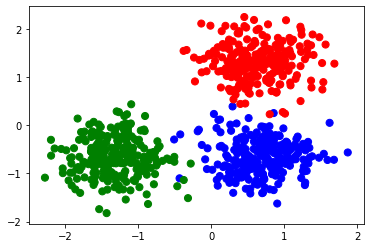

In [0]:
color_theme=np.array(["red","green","blue"])
plt.scatter(x_df.x1,x_df.x2,c=color_theme[labels_true],s=50)

In [0]:
my_clustering=Dbscan(0.3,10,2)
my_clustering.fit(x)
#ep,minPts,p

In [0]:
print(my_clustering.number_of_clusters())
pred_true=my_clustering.labels
print(pred_true[:20])

4
[0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, -1, 1, 1, 2]


In [0]:
for i in set(my_clustering.labels):
  print(pred_true.count(i),i)
print(set(pred_true))

243 0
244 1
245 2
18 -1
{0, 1, 2, -1}


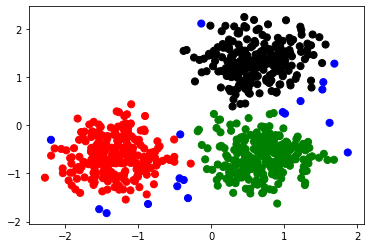

In [0]:
color_theme=np.array(["black","red","green","blue"])
plt.scatter(x_df.x1,x_df.x2,c=color_theme[pred_true],s=50)